In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# 分類数設定

In [3]:
NUM_CLASSES = 10

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/5 [=====>........................] - ETA: 2s - loss: 2.3552 - accuracy: 0.0859
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 1s 155ms/step - loss: 2.3715 - accuracy: 0.0813 - val_loss: 2.3321 - val_accuracy: 0.1148
Epoch 2/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.3685 - accuracy: 0.0859
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 26ms/step - loss: 2.3565 - accuracy: 0.0781 - val_loss: 2.3167 - val_accuracy: 0.1196
Epoch 3/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.2943 - accuracy: 0.1250
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 60ms/step - loss: 2.3371 - accuracy: 0.0877 - val_loss: 2.3038 - val_accuracy: 0.1148
Epoch 4/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.3607 - accuracy: 0.0391
Epoch 4: sa

5/5 [==============================] - 0s 23ms/step - loss: 2.0341 - accuracy: 0.2887 - val_loss: 1.9337 - val_accuracy: 0.3732
Epoch 29/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.0497 - accuracy: 0.2891
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 24ms/step - loss: 2.0305 - accuracy: 0.2711 - val_loss: 1.9184 - val_accuracy: 0.3636
Epoch 30/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.0293 - accuracy: 0.2891
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 2.0146 - accuracy: 0.2807 - val_loss: 1.9005 - val_accuracy: 0.3732
Epoch 31/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.9789 - accuracy: 0.2344
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 26ms/step - loss: 1.9988 - accuracy: 0.2584 - val_loss: 1.

Epoch 56/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.6689 - accuracy: 0.4219
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 21ms/step - loss: 1.6823 - accuracy: 0.4099 - val_loss: 1.4173 - val_accuracy: 0.5885
Epoch 57/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.6390 - accuracy: 0.3984
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 21ms/step - loss: 1.6850 - accuracy: 0.3604 - val_loss: 1.4005 - val_accuracy: 0.5981
Epoch 58/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.6356 - accuracy: 0.3203
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 20ms/step - loss: 1.6846 - accuracy: 0.3684 - val_loss: 1.3866 - val_accuracy: 0.5981
Epoch 59/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.6604 - accuracy: 0.3438
Epoch

1/5 [=====>........................] - ETA: 0s - loss: 1.4189 - accuracy: 0.4609
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 1.4147 - accuracy: 0.4322 - val_loss: 1.0572 - val_accuracy: 0.7033
Epoch 84/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3254 - accuracy: 0.4922
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 24ms/step - loss: 1.3786 - accuracy: 0.4864 - val_loss: 1.0461 - val_accuracy: 0.7129
Epoch 85/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3198 - accuracy: 0.5312
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 22ms/step - loss: 1.4177 - accuracy: 0.4466 - val_loss: 1.0357 - val_accuracy: 0.7321
Epoch 86/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3235 - accuracy: 0.4922
Epoch 86: saving mo

1/5 [=====>........................] - ETA: 0s - loss: 1.3826 - accuracy: 0.4141
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 24ms/step - loss: 1.2844 - accuracy: 0.5008 - val_loss: 0.8669 - val_accuracy: 0.7847
Epoch 111/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.2994 - accuracy: 0.4922
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 21ms/step - loss: 1.3171 - accuracy: 0.4545 - val_loss: 0.8626 - val_accuracy: 0.8278
Epoch 112/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.2608 - accuracy: 0.5234
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 1.2403 - accuracy: 0.5327 - val_loss: 0.8551 - val_accuracy: 0.8612
Epoch 113/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3591 - accuracy: 0.5078
Epoch 113: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.1958 - accuracy: 0.4844
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 22ms/step - loss: 1.2118 - accuracy: 0.4976 - val_loss: 0.7413 - val_accuracy: 0.8612
Epoch 138/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.2767 - accuracy: 0.4766
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 21ms/step - loss: 1.1783 - accuracy: 0.5199 - val_loss: 0.7405 - val_accuracy: 0.8708
Epoch 139/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1404 - accuracy: 0.5469
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 22ms/step - loss: 1.1660 - accuracy: 0.5311 - val_loss: 0.7426 - val_accuracy: 0.8804
Epoch 140/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1858 - accuracy: 0.5469
Epoch 140: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.0696 - accuracy: 0.5234
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 1.0819 - accuracy: 0.5758 - val_loss: 0.6618 - val_accuracy: 0.9569
Epoch 165/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.1661 - accuracy: 0.5312
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 1.0963 - accuracy: 0.5821 - val_loss: 0.6611 - val_accuracy: 0.9569
Epoch 166/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9697 - accuracy: 0.6328
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 1.0946 - accuracy: 0.5885 - val_loss: 0.6584 - val_accuracy: 0.9378
Epoch 167/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0704 - accuracy: 0.5703
Epoch 167: sa

1/5 [=====>........................] - ETA: 0s - loss: 1.0698 - accuracy: 0.5859
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 24ms/step - loss: 1.0374 - accuracy: 0.6236 - val_loss: 0.6090 - val_accuracy: 0.9474
Epoch 192/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0016 - accuracy: 0.6172
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 21ms/step - loss: 1.0354 - accuracy: 0.6220 - val_loss: 0.6058 - val_accuracy: 0.9474
Epoch 193/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0477 - accuracy: 0.5781
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 0.9948 - accuracy: 0.6108 - val_loss: 0.6008 - val_accuracy: 0.9378
Epoch 194/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0373 - accuracy: 0.6094
Epoch 194: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.9577 - accuracy: 0.6953
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 30ms/step - loss: 1.0134 - accuracy: 0.6252 - val_loss: 0.5622 - val_accuracy: 0.9139
Epoch 219/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8612 - accuracy: 0.6953
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 1.0042 - accuracy: 0.6124 - val_loss: 0.5590 - val_accuracy: 0.9139
Epoch 220/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9302 - accuracy: 0.6875
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 21ms/step - loss: 0.9579 - accuracy: 0.6427 - val_loss: 0.5545 - val_accuracy: 0.9139
Epoch 221/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.0279 - accuracy: 0.5859
Epoch 221: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.9650 - accuracy: 0.6406
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 30ms/step - loss: 0.9508 - accuracy: 0.6411 - val_loss: 0.5188 - val_accuracy: 0.9091
Epoch 246/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8627 - accuracy: 0.6875
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 27ms/step - loss: 0.9150 - accuracy: 0.6507 - val_loss: 0.5190 - val_accuracy: 0.9043
Epoch 247/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9874 - accuracy: 0.5859
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 27ms/step - loss: 0.9021 - accuracy: 0.6603 - val_loss: 0.5205 - val_accuracy: 0.8947
Epoch 248/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8970 - accuracy: 0.6719
Epoch 248: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.9511 - accuracy: 0.6406
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 27ms/step - loss: 0.9562 - accuracy: 0.6332 - val_loss: 0.4874 - val_accuracy: 0.9234
Epoch 273/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8692 - accuracy: 0.6406
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 24ms/step - loss: 0.9107 - accuracy: 0.6380 - val_loss: 0.4880 - val_accuracy: 0.9330
Epoch 274/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9518 - accuracy: 0.6250
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 27ms/step - loss: 0.9022 - accuracy: 0.6475 - val_loss: 0.4885 - val_accuracy: 0.9330
Epoch 275/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8855 - accuracy: 0.6016
Epoch 275: sa

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 4ms/step - loss: 0.4808 - accuracy: 0.9378


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 135ms/step
[1.6468297e-11 1.1263010e-11 3.1972988e-05 6.8130269e-08 6.3002939e-17
 6.9897769e-15 2.8268935e-04 8.3431315e-01 1.2068522e-18 1.6537204e-01]
7


# 混同行列

7/7 [==============================] - 0s 3ms/step


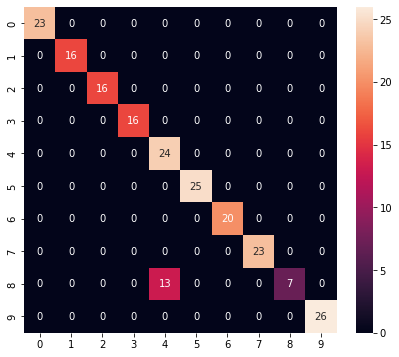

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        16
           4       0.65      1.00      0.79        24
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        23
           8       1.00      0.35      0.52        20
           9       1.00      1.00      1.00        26

    accuracy                           0.94       209
   macro avg       0.96      0.93      0.93       209
weighted avg       0.96      0.94      0.93       209



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Cendekia\AppData\Local\Temp\tmpi6sm8kjf\assets


6752

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.6468323e-11 1.1263048e-11 3.1973039e-05 6.8130248e-08 6.3003164e-17
 6.9897739e-15 2.8268941e-04 8.3431286e-01 1.2068517e-18 1.6537230e-01]
7
